<p align="center">
  <img width="600" height="300" src="https://raw.githubusercontent.com/RAHXION/logo/main/RAHXION_Logo.png">
</p>



## <center> Cálculo del volumen original de hidrocarburos </center>
## <center> Aplicación del método de simulación Montecarlo </center>
##### Siguenos en nuestras redes sociales:  [LinkedIn](https://www.linkedin.com/company/rahxion/)

**RAHXION** es un consorcio de geomodelado, ingeniería y optimización que tiene como objetivo principal proporcionar soluciones prácticas para mantener, optimizar e incrementar la producción de hidrocarburos, así como también proveer soluciones efectivas a los retos tecnológicos que enfrentan las áreas de exploración y explotación de petróleo y gas.

# Resumen ejecutivo

El desarrollo de un campo petrolero está en función del volumen de hidrocarburos en sitio el cual puede ser estimado de forma volumétrica y probabilística a partir del método de simulación Montecarlo. Para aplicar el método es necesario conocer la extensión del yacimiento, así como su configuración petrofísica y estructural, adicionalmente se requieren conocer las condiciones de presión y temperatura del yacimiento y tipo de fluido a producir.

Durante la sesión se presentarán conceptos y definiciones relacionados con el tema y un caso de aplicación del cálculo de volumen original de hidrocarburos en un campo de gas el cual cuenta con datos de perforación y mapeo de propiedades petrofísicas para definir la cantidad de hidrocaburos mediante percentiles de probabilidad.

# Introducción y conceptos

## Librerías

A continuación se presetan las principales librerías a utilizar y una breve descripción de sus características:

In [ ]:
import matplotlib.pyplot as plt # librería especializada en generación de gráficas
import numpy as np # librería especializada en manejo de arreglos y matrices
import pandas as pd # librería especializada en análisis de datos
import math # libería especializada en funciones matemáticas
import random # módulo para generar números aleatorios
import ipywidgets as widgets # para generar graficas interactivas

## Volumen de hidrocarburos en sitio

El cálculo de volumen original de gas se puede realizar de forma volumétrica utilizando la siguiente expresión:

\\


$$OGIP=\frac{A*H*\phi*(1-Sw)}{Bg}$$

donde:
* $OGIP$, Original Gas In Place
* $A$, área o extensión del yacimiento
* $H$, espesor neto del yacimiento
* $\phi$, porosidad efectiva
* $Sw$, saturación de gas
* $Bg$, factor de volumen del gas




**Nota**: Para yacimientos de aceite bajosaturado la ecuación descrita anteriormente utiliza el factor de volumen del aceite  $Bo$  en lugar del factor de voumen del gas  $Bg$ y el cálculo se realizará para estimar el aceite original en sitio ($OOIP$, Original Oil In Place)

In [ ]:
#Ejemplo de cálculo de OGIP
A = 2 #km2
H = 10 #m
Poro = 0.20 # -
Sw = 0.3 # -
Bg = 0.003 # cf/scf

OGIP = A*1000**2*H*Poro*(1-Sw)/Bg #m3 @ cs
OGIP = OGIP*3.28**3/1000000 # MMPC

print(OGIP)

32935.04853333333


Nota: Para yacimientos de aceite bajosaturado la ecuación descrita anteriormente utiliza el factor de volumen del aceite $Bo$ en lugar del factor de voumen del gas $Bg$.

## Distribución de probabilidad normal

El método de Montecarlo utiliza la distribución de probabilidad de las variables que intervienen en una función objetivo, para el cálculo de volumen original de hidrocarburos estas variables son principalmente porosidad, espesor y saturación de agua.

Para el analisis de probabilidad se puede utilizar la ecuación de distribución normal:

$$f(x)=\frac{1}{\sigma*\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

donde:

* $x$, es la variable principal
* $\mu$, es la media
* $\sigma$, es la desviación estándar

Para el cálculo de la desviación estandar se tiene:


$$\sigma=\sqrt{\frac{\Sigma(x-\mu)^2}{n}}$$

donde:

 n, es el número de datos


In [ ]:
# Función de distribución normal
def d_normal(sigma, media):
  #Declaración de variables
  x = [] # lista
  fx = [] # lista
  Acfx = [] # lista

  Sumafx = 0
  cont = 0

  for i in range(1000,2000): # para asignar valores
      OP1 = i/100
      x.append(OP1) #.append agrega el valor al final de lista

      OP2=math.exp(-0.5*((OP1-media)/sigma)**2)/(sigma*(2*math.pi)**0.5) # ecuación de distribución normal
      fx.append(OP2)

      Sumafx = Sumafx + fx[cont]
      Acfx.append(Sumafx)
      cont = cont + 1

  for i in range(len(Acfx)):
      Acfx[i]= Acfx[i]/Sumafx

  # Gráfica de distribución normal
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,4))
  ax1.plot(x, fx,'b')
  ax1.set_xlim(10,20)
  ax1.set_ylim(0,0.5)
  ax1.set_title('Distribición normal')
  ax1.set_xlabel('x')
  ax1.set_ylabel('fx')

  # Gráfica de distribución normal acumulada
  ax2.plot(x, Acfx, 'b')
  ax2.set_xlim(10,20)
  ax2.set_ylim(0,1)
  ax2.set_xlim(10,20)
  ax2.set_ylim(0,1)
  ax2.set_title('Distribición acumulada')
  ax2.set_xlabel('x')
  ax2.set_ylabel('Acfx')

  plt.show()

  return(x, fx, Acfx)

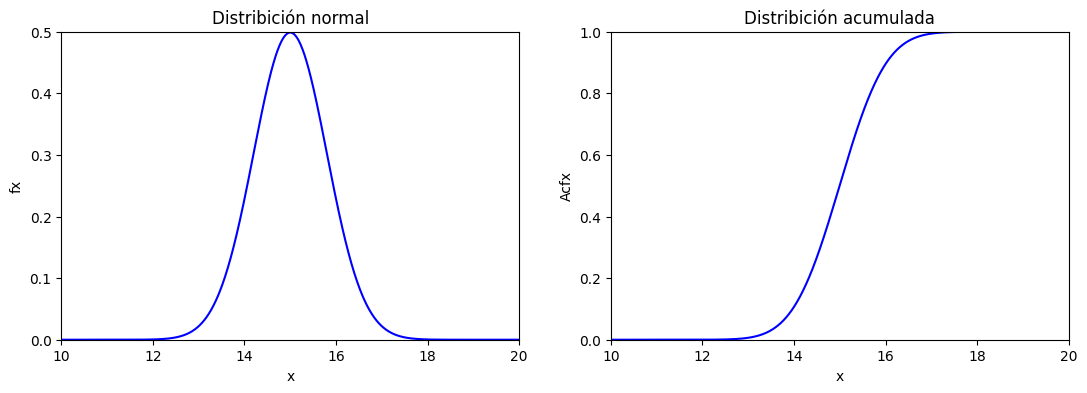

In [ ]:
# Ejemplo de distribución normal
# d_normal(sigma, media)
x, fx, Acfx =  d_normal(0.8, 15)

In [ ]:
# Gráfica interactiva
Interactiva  = widgets.interactive(d_normal, sigma=(0.8, 5), media=(10, 20))
Interactiva

interactive(children=(FloatSlider(value=2.9000000000000004, description='sigma', max=5.0, min=0.8), IntSlider(…

## Método de simulación Montecarlo

El método de simulación Montecarlo es un proceso iterativo de datos aleatorios de las variables principales que intervienen en una función objetivo, para su  implementación es importante conocer el rango de las variables principales y la probabilidad de ocurrencia, de tal manera que al generar un gran número de datos aleatorios de las variables principales se tenga un conjunto de valores de la función principal permitiendo observas su comportamiento.

Patra llevar a cabo el método se tienen los siguientes pasos:

* 1.- Indentificar la función objetivo.

* 2.- Indetntificar las variables que intervienen en la función objetivo.

* 3.- Caracterizar el comportamiento de las variables que intervienen en la función objetivo.

* 4.- Realizar la simulación para la función principal utilizando una gran catidad de valores aleatorios (a mayor número de datos aleatorios la aproximación será mejor).

* 5.- Analizar los resultados y repetir el proceso si no es concluyente.



<p align="center">
  <img width="550"
   height="650"
   src="https://raw.githubusercontent.com/RAHXION/Sim.Montecarlo_Ej1/main/DFlujo.png">
</p>

# Caso de aplicación

## Archivos de datos

Del estudio de caracterización se realizó el mapeo de las propiedades de porosidad, saturación de agua y espesor neto del yacimiento, a continuación se muestra la carga de datos.

In [ ]:
#Lectura de archivos de porosidad, saturación de agua y espesor
Porofile = pd.read_csv('https://raw.githubusercontent.com/RAHXION/Sim.Montecarlo_Ej1/main/Props_Poro.csv') #%
Swfile = pd.read_csv('https://raw.githubusercontent.com/RAHXION/Sim.Montecarlo_Ej1/main/Props_Sw.csv')     #%
Hfile = pd.read_csv('https://raw.githubusercontent.com/RAHXION/Sim.Montecarlo_Ej1/main/Props_H.csv')      #m

# Nota: revisar los archivos .csv

In [ ]:
xPoro, yPoro, zPoro = Porofile.POINT_X, Porofile.POINT_Y, Porofile.Z   #% Asignación de datos de porosidad
xSw, ySw, zSw = Swfile.POINT_X, Swfile.POINT_Y, Swfile.Z               #% Asignación de datos de saturación de agua
xH, yH, zH = Hfile.POINT_X, Hfile.POINT_Y, Hfile.Z                     #m Asignación de datos de espesor

In [ ]:
#La función len permite ver la longitud de una lista
print(len(xPoro))
print(len(xSw))
print(len(xH))

6366
6366
6366


## Visualización de propiedades




La visualización de las propiedades petrofísicas del yacimiento se muestra a continuación:

In [ ]:
#Definición del área del yacimiento
# El área puede ser una variable dentro del proceso de simulación
# Si la delimitación del yacimiento es adecuada se puede tomar como un valor fijo
A= 1.72 # Área km2

(array([2820000., 2820500., 2821000., 2821500., 2822000., 2822500.]),
 [Text(0, 2820000.0, '2.8200'),
  Text(0, 2820500.0, '2.8205'),
  Text(0, 2821000.0, '2.8210'),
  Text(0, 2821500.0, '2.8215'),
  Text(0, 2822000.0, '2.8220'),
  Text(0, 2822500.0, '2.8225')])

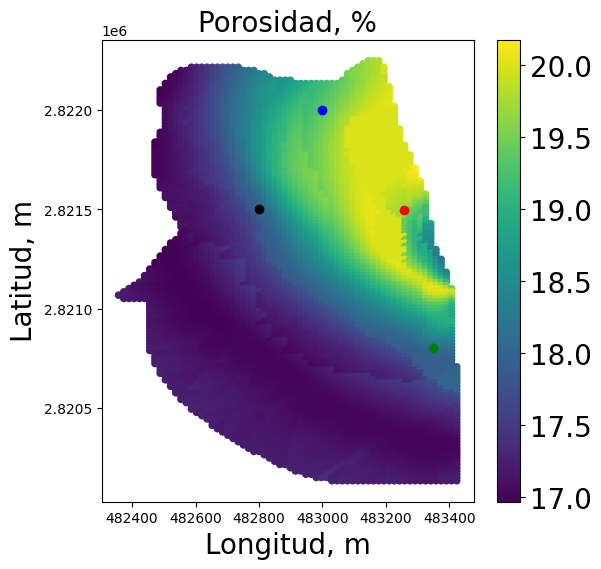

In [ ]:
#Distribución de porosidad
plt.figure(figsize=(6, 6))
plt.scatter(xPoro,yPoro, c = zPoro, s=20) # Gráfico de dispersión #Probar 1
plt.plot(483258, 2821497, 'or') #Pozo1
plt.plot(483000, 2822000, 'ob') #Pozo2
plt.plot(482800, 2821500, 'ok') #Pozo3
plt.plot(483350, 2820800, 'og') #Pozo4
plt.title("Porosidad, %", fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.ylabel('Latitud, m',fontsize=20)
plt.xlabel('Longitud, m',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

(array([2820000., 2820500., 2821000., 2821500., 2822000., 2822500.]),
 [Text(0, 2820000.0, '2.8200'),
  Text(0, 2820500.0, '2.8205'),
  Text(0, 2821000.0, '2.8210'),
  Text(0, 2821500.0, '2.8215'),
  Text(0, 2822000.0, '2.8220'),
  Text(0, 2822500.0, '2.8225')])

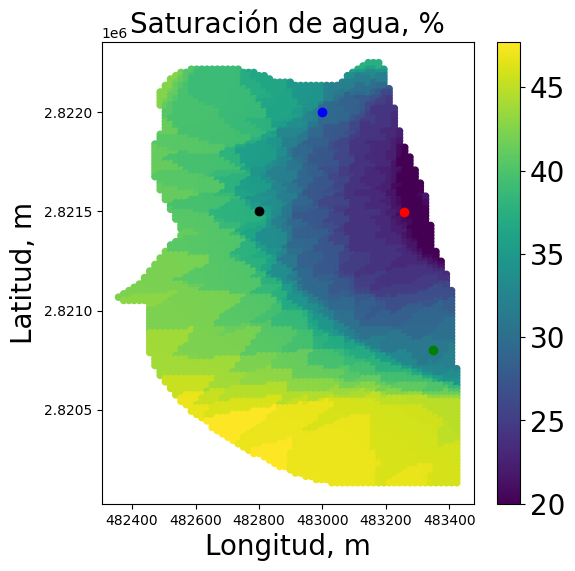

In [ ]:
#Distribución de saturación de agua
plt.figure(figsize=(6, 6))
plt.scatter(xSw,ySw, c = zSw, s = 20)  # Gráfico de dispersión
plt.title("Saturación de agua, %", fontsize=20)
plt.plot(483258,2821497, 'or') #Pozo1
plt.plot(483000,2822000, 'ob') #Pozo2
plt.plot(482800,2821500, 'ok') #Pozo3
plt.plot(483350,2820800, 'og') #Pozo4
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.ylabel('Latitud, m', fontsize=20)
plt.xlabel('Longitud, m', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

(array([2820000., 2820500., 2821000., 2821500., 2822000., 2822500.]),
 [Text(0, 2820000.0, '2.8200'),
  Text(0, 2820500.0, '2.8205'),
  Text(0, 2821000.0, '2.8210'),
  Text(0, 2821500.0, '2.8215'),
  Text(0, 2822000.0, '2.8220'),
  Text(0, 2822500.0, '2.8225')])

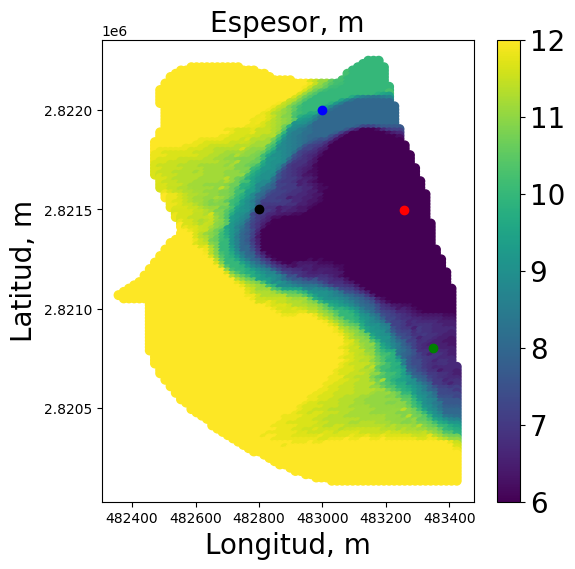

In [ ]:
#Distribución de espesor
plt.figure(figsize=(6, 6))
plt.scatter(xH, yH, c = zH, s = 38)  # Gráfico de dispersión
plt.title("Espesor, m", fontsize=20)
plt.plot(483258,2821497, 'or', alpha=1) #Pozo1
plt.plot(483000,2822000, 'ob', alpha=1) #Pozo2
plt.plot(482800,2821500, 'ok', alpha=1) #Pozo3
plt.plot(483350,2820800, 'og', alpha=1) #Pozo4
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.ylabel('Latitud, m', fontsize=20)
plt.xlabel('Longitud, m', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

##Propiedades de fluido

In [ ]:
#Área y factor de volumen del gas
#Presión de yacimiento 7000 psi
#Temperatura de yacimiento 128°C
Bg=0.003 #m3/sm3

<p align="left">
  <img width="700"
   height="400"
   src="https://raw.githubusercontent.com/RAHXION/Sim.Montecarlo_Ej1/main/Bg_P1.png">
</p>

## Estadística

Para conocer la variación de las propiedades petrofísicas se pueden obtener algunos parámetros estadísticos como son: Media, desviación estándar, valores máximos y mínimos de cada propiedad. A continuación, se muestran los valores obtenidos.

In [ ]:
#Media
DatosPoro = len(zPoro)
DatosSw = len(zSw)
DatosH = len(zH)
MediaPoro = sum(zPoro)/DatosPoro   #Promedio
MediaSw = sum(zSw)/DatosSw         #Promedio
MediaH = sum(zH)/DatosH            #Promedio

In [ ]:
#MediaPoro       #De ecuación
np.mean(zPoro) #Utilizando np

17.998720050062833

In [ ]:
#MediaSw         #De ecuación
np.mean(zSw)   #Utilizando np

36.617680138737036

In [ ]:
#MediaH          #De ecuación
np.mean(zH)    #Utilizando np

9.828841452104932

In [ ]:
#Desviación estandar
SumaPoro=0
SumaSw=0
SumaH=0
for i in range(0,DatosPoro):
    #Se utiliza un solo ciclo ya que la cantidad de datos coincide
    SumaPoro=SumaPoro+(zPoro[i]-MediaPoro)**2
    SumaSw=SumaSw+(zSw[i]-MediaSw)**2
    SumaH=SumaH+(zH[i]-MediaH)**2
DEPoro=(SumaPoro/DatosPoro)**0.5
DESw=(SumaSw/DatosSw)**0.5
DEH=(SumaH/DatosH)**0.5

In [ ]:
#DEPoro            #De ecuación
np.std(zPoro)    #Utilizando np

1.0432555828910794

In [ ]:
#DESw             #De ecuación
np.std(zSw)     #Utilizando np

7.879347095098877

In [ ]:
#DEH              #De ecuación
np.std(zH)      #Utilizando np

2.4502852598136298

In [ ]:
#Máximos y mínimos
minPoro=min(zPoro)     #Porosisdad
maxPoro=max(zPoro)
minSw=min(zSw)         #Saturación de agua
maxSw=max(zSw)
minH=min(zH)           #Espesor
maxH=max(zH)


In [ ]:
print(minPoro)
print(maxPoro)
print(minSw)
print(maxSw)
print(minH)
print(maxH)

16.9668007
20.1767006
20.0
47.7369003
6.0
12.0


## Discretización de datos y generación de histogramas



A partir de la construcción de histogramas se puede visualizar la frecuencia  de ocurrencia de los valores de las propiedades del yacimiento, esto permite observar la tendencia y rango de las variables principales.

In [ ]:
#Discretización de histograma
Dis=20 #Numero de intervalos de discretización
#Rango entre intervalos
DPoro=(maxPoro-minPoro)/Dis
DSw=(maxSw-minSw)/Dis
DH=(maxH-minH)/Dis

In [ ]:
#Intervalos
DisPoro = [] # intervalos
DisSw = [] # intervalos
DisH = [] # intervalos
for i in range(0,Dis):
    if i==0:
        OP=minPoro
        DisPoro.append(OP)

        OP=minSw
        DisSw.append(OP)

        OP=minH
        DisH.append(OP)
    else:
        OP=DisPoro[i-1]+DPoro
        DisPoro.append(OP)

        OP=DisSw[i-1]+DSw
        DisSw.append(OP)

        OP=DisH[i-1]+DH
        DisH.append(OP)

DisPoro.append(maxPoro)
DisSw.append(maxSw)
DisH.append(maxH)

In [ ]:
DisPoro
#len(DisPoro)

[16.9668007,
 17.127295695,
 17.28779069,
 17.448285685000002,
 17.608780680000002,
 17.769275675000003,
 17.929770670000003,
 18.090265665000004,
 18.250760660000005,
 18.411255655000005,
 18.571750650000006,
 18.732245645000006,
 18.892740640000007,
 19.053235635000007,
 19.213730630000008,
 19.374225625000008,
 19.53472062000001,
 19.69521561500001,
 19.85571061000001,
 20.01620560500001,
 20.1767006]

In [ ]:
DisSw
#len(DisSw)

[20.0,
 21.386845015,
 22.773690029999997,
 24.160535044999996,
 25.547380059999995,
 26.934225074999993,
 28.321070089999992,
 29.70791510499999,
 31.09476011999999,
 32.48160513499999,
 33.86845014999999,
 35.255295164999986,
 36.642140179999984,
 38.02898519499998,
 39.41583020999998,
 40.80267522499998,
 42.18952023999998,
 43.57636525499998,
 44.963210269999976,
 46.350055284999975,
 47.7369003]

In [ ]:
DisH
#len(DisH)

[6.0,
 6.3,
 6.6,
 6.8999999999999995,
 7.199999999999999,
 7.499999999999999,
 7.799999999999999,
 8.1,
 8.4,
 8.700000000000001,
 9.000000000000002,
 9.300000000000002,
 9.600000000000003,
 9.900000000000004,
 10.200000000000005,
 10.500000000000005,
 10.800000000000006,
 11.100000000000007,
 11.400000000000007,
 11.700000000000008,
 12.0]

In [ ]:
#Frecuencia
CountPoro = [0 for i in range(Dis)] #Genera una lista donde todos sus valores son 0
CountSw = [0 for i in range(Dis)]
CountH = [0 for i in range(Dis)]
for j in range (0,Dis):
    for i in range (0,DatosPoro):
        if zPoro[i] >=  DisPoro[j] and zPoro[i] < DisPoro[j+1]:
            CountPoro[j]=CountPoro[j]+1
        #Max
        if zPoro[i] == maxPoro and j == Dis-1:
            CountPoro[j]=CountPoro[j]+1

        if zSw[i] >=  DisSw[j] and zSw[i] < DisSw[j+1]:
            CountSw[j]=CountSw[j]+1
        #Max
        if zSw[i] == maxSw and j == Dis-1:
            CountSw[j]=CountSw[j]+1

        if zH[i] >=  DisH[j] and zH[i] < DisH[j+1]:
            CountH[j]=CountH[j]+1
        #Max
        if zH[i] == maxH and j == Dis-1:
            CountH[j]=CountH[j]+1

In [ ]:
CountPoro

[1567,
 1191,
 389,
 277,
 187,
 184,
 246,
 158,
 155,
 133,
 142,
 123,
 154,
 165,
 183,
 209,
 170,
 190,
 485,
 58]

In [ ]:
CountSw

[151,
 92,
 409,
 161,
 210,
 253,
 381,
 194,
 198,
 204,
 187,
 197,
 292,
 348,
 856,
 433,
 367,
 330,
 522,
 581]

In [ ]:
CountH

[1216,
 153,
 179,
 136,
 65,
 63,
 186,
 63,
 80,
 105,
 78,
 74,
 77,
 210,
 61,
 89,
 213,
 360,
 413,
 2545]

In [ ]:
#Usando np.hist()
count, bins = np.histogram(zPoro, Dis)
print(count, "\n")
print(bins)

[1567 1191  389  277  187  184  246  158  155  133  142  123  154  165
  183  209  170  190  485   58] 

[16.9668007  17.1272957  17.28779069 17.44828569 17.60878068 17.76927567
 17.92977067 18.09026567 18.25076066 18.41125566 18.57175065 18.73224564
 18.89274064 19.05323564 19.21373063 19.37422563 19.53472062 19.69521562
 19.85571061 20.0162056  20.1767006 ]


In [ ]:
#Usando np.hist()
count, bins = np.histogram(zSw, Dis)
print(count, "\n")
print(bins)

[151  92 409 161 210 253 381 194 198 204 187 197 292 348 856 433 367 330
 522 581] 

[20.         21.38684501 22.77369003 24.16053504 25.54738006 26.93422508
 28.32107009 29.7079151  31.09476012 32.48160514 33.86845015 35.25529516
 36.64214018 38.0289852  39.41583021 40.80267523 42.18952024 43.57636525
 44.96321027 46.35005528 47.7369003 ]


In [ ]:
#Usando np.hist()
count, bins = np.histogram(zH, Dis)
print(count, "\n")
print(bins)

[1216  153  179  136   65   63  186   63   80   86   97   74   77  210
   56   94  213  360  413 2545] 

[ 6.   6.3  6.6  6.9  7.2  7.5  7.8  8.1  8.4  8.7  9.   9.3  9.6  9.9
 10.2 10.5 10.8 11.1 11.4 11.7 12. ]


Text(0.5, 1.0, 'Porosidad')

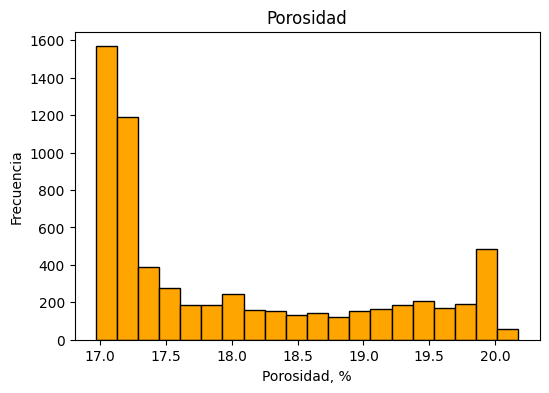

In [ ]:
#Hist. porosidad
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
plt.hist(zPoro, bins=Dis, density = False, ec="black", color='orange') #Probar bins=,10,20,30
plt.ylabel('Frecuencia')
plt.xlabel('Porosidad, %')
plt.title('Porosidad')

Text(0.5, 1.0, 'Saturación de agua')

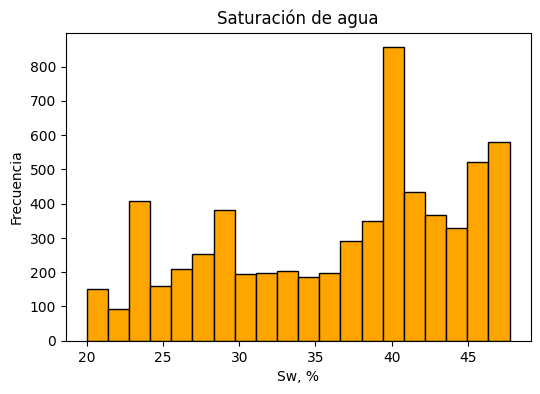

In [ ]:
#@title
#Hist. Sw
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
plt.hist(zSw, bins=Dis, density = False, ec="black", color='orange') #Probar bins=,10,20,30
plt.ylabel('Frecuencia')
plt.xlabel('Sw, %')
plt.title('Saturación de agua')

Text(0.5, 1.0, 'Espesor')

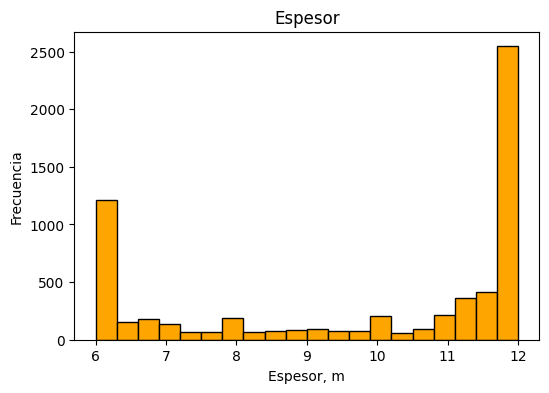

In [ ]:
#@title
#Hist. H
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
plt.hist(zH, bins=Dis, density = False, ec="black", color='orange') #Probar bins=,10,20,30
plt.ylabel('Frecuencia')
plt.xlabel('Espesor, m')
plt.title('Espesor')

## Generación de curvas de distribución de probabilidad

In [ ]:
#Marcas de clase
ClasePoro = []
ClaseSw = []
ClaseH = []
for i in range (0, Dis):
    OP = DisPoro[i]+ DPoro/2
    ClasePoro.append(OP)
    OP = DisSw[i]+ DSw/2
    ClaseSw.append(OP)
    OP = DisH[i]+ DH/2
    ClaseH.append(OP)

In [ ]:
#Distribución de probabilidad
fxPoro = []
fxSw = []
fxH = []
SumafxPoro=0
SumafxSw=0
SumafxH=0
for i in range(0,Dis):
    OP=math.exp(-0.5*((ClasePoro[i]-MediaPoro)/DEPoro)**2)/(DEPoro*(2*math.pi)**0.5)
    fxPoro.append(OP)
    SumafxPoro=fxPoro[i]+SumafxPoro

    OP=math.exp(-0.5*((ClaseSw[i]-MediaSw)/DESw)**2)/(DESw*(2*math.pi)**0.5)
    fxSw.append(OP)
    SumafxSw=fxSw[i]+SumafxSw

    OP=math.exp(-0.5*((ClaseH[i]-MediaH)/DEH)**2)/(DEH*(2*math.pi)**0.5)
    fxH.append(OP)
    SumafxH=fxH[i]+SumafxH

In [ ]:
fxPoro

[0.25224574639206904,
 0.28683460388314375,
 0.3185376909867726,
 0.3454710844996496,
 0.36591833468658275,
 0.37851076015829244,
 0.3823788660123737,
 0.377251628867842,
 0.3634878997316261,
 0.34203487016156653,
 0.3143202796631566,
 0.28209540489787216,
 0.24725279711010043,
 0.2116449968852389,
 0.1769279279965989,
 0.14444628216355812,
 0.11516962073654259,
 0.08967907021318502,
 0.06819709083414767,
 0.05064798740680374]

In [ ]:
fxSw

[0.006568767911180074,
 0.009230887223294975,
 0.012576179168578705,
 0.01661115115947741,
 0.021271420255701088,
 0.026408211468478375,
 0.03178536723730212,
 0.03709037475021813,
 0.04196052879014988,
 0.04602209951760851,
 0.04893703415068057,
 0.05044923750158358,
 0.05042167995086967,
 0.0488568833884852,
 0.04589654047964227,
 0.04180034691440816,
 0.03690842938761238,
 0.03159490008020101,
 0.026221295895495135,
 0.021097794599789704]

In [ ]:
fxH

[0.052747777152149636,
 0.06291906103617131,
 0.07393500644666182,
 0.08558700110847355,
 0.09760123559312633,
 0.10964595993772132,
 0.12134440725983776,
 0.1322929518966226,
 0.14208343947852264,
 0.1503280515251798,
 0.1566846338790315,
 0.1608802001663468,
 0.16273036584399792,
 0.16215278633941094,
 0.15917323495206057,
 0.15392369555627974,
 0.14663266673211858,
 0.13760866960418974,
 0.12721861739862292,
 0.11586315723587054]

Text(0.5, 1.0, 'Porosidad')

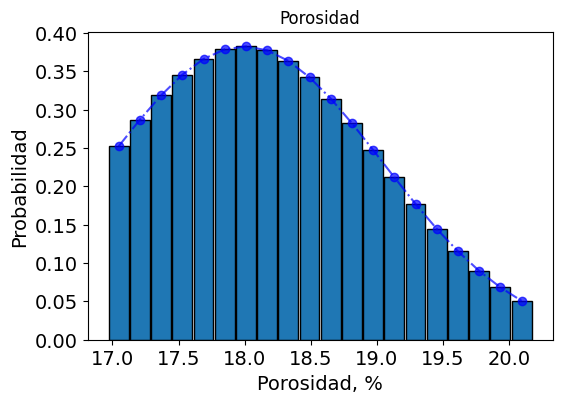

In [ ]:
#Distribución de probabilidad Porosidad
fig, ax = plt.subplots(1,1,dpi=100,figsize=(6,4))
ax.bar(ClasePoro,fxPoro, ec='black', width = 0.15)
ax.plot(ClasePoro,fxPoro,'-.ob',alpha=0.7,label='Distribución de probabilidad')
ax.set_ylabel('Probabilidad',fontsize=14)
ax.set_xlabel('Porosidad, %',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Porosidad')

Text(0.5, 1.0, 'Saturación de agua')

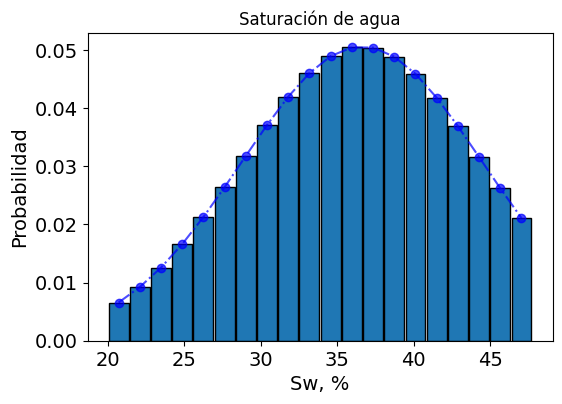

In [ ]:
#Distribución de probabilidad Sw
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
ax.bar(ClaseSw,fxSw, ec='black', width = 1.3)
ax.plot(ClaseSw,fxSw,'-.ob',alpha=0.7,label='Distribución de probabilidad')
ax.set_ylabel('Probabilidad',fontsize=14)
ax.set_xlabel('Sw, %',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Saturación de agua')

Text(0.5, 1.0, 'Espesor')

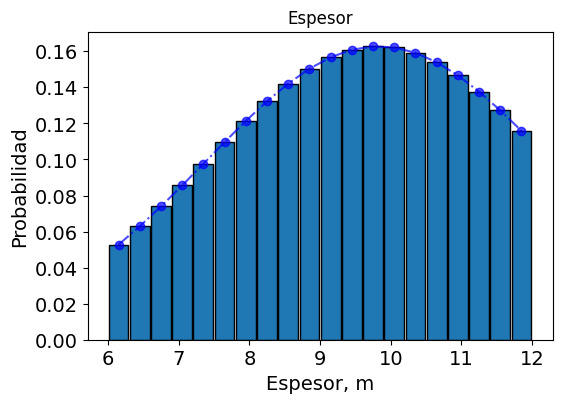

In [ ]:
#Distribución de probabilidad H
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
ax.bar(ClaseH,fxH, ec='black', width = 0.28)
ax.plot(ClaseH,fxH,'-.ob',alpha=0.7,label='Distribución de probabilidad')
ax.set_ylabel('Probabilidad',fontsize=14)
ax.set_xlabel('Espesor, m',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Espesor')

In [ ]:
#Distribución de probabilidad acumulada
fxPoroAc = []
fxSwAc = []
fxHAc = []
for i in range(0,Dis):
    OP= fxPoro[i]/SumafxPoro
    fxPoro[i]=OP

    OP= fxSw[i]/SumafxSw
    fxSw[i]=OP

    OP= fxH[i]/SumafxH
    fxH[i]=OP

    if i==0:
        OP=fxPoro[i]
        fxPoroAc.append(OP)

        OP=fxSw[i]
        fxSwAc.append(OP)

        OP=fxH[i]
        fxHAc.append(OP)
    else:
        OP=fxPoro[i] + fxPoroAc[i-1]
        fxPoroAc.append(OP)

        OP=fxSw[i] + fxSwAc[i-1]
        fxSwAc.append(OP)

        OP=fxH[i] + fxHAc[i-1]
        fxHAc.append(OP)

In [ ]:
fxPoroAc

[0.04933368560621693,
 0.10543218626025888,
 0.1677311091386104,
 0.23529760773182662,
 0.3068631359485828,
 0.3808914639077594,
 0.45567630776790274,
 0.5294583775121897,
 0.6005485664391097,
 0.6674430175538044,
 0.7289171081117409,
 0.7840887263263014,
 0.8324459015506879,
 0.8738389790784896,
 0.9084421662465173,
 0.9366926623328526,
 0.9592172913585989,
 0.97675653282703,
 0.9900943745412808,
 0.9999999999999999]

In [ ]:
fxSwAc

[0.010079293983323395,
 0.024243415369335206,
 0.04354064260297029,
 0.06902923927767267,
 0.10166867807335915,
 0.14219014732964586,
 0.1909624688798388,
 0.24787493650147574,
 0.31226029934125465,
 0.3828778454381768,
 0.45796814555932,
 0.5353788111344436,
 0.6127471916632905,
 0.6877145063012992,
 0.7581393912366401,
 0.8222789667022521,
 0.8789122524707009,
 0.9273923160972546,
 0.9676269770760022,
 0.9999999999999999]

In [ ]:
fxHAc

[0.021003729404213932,
 0.04605758008230086,
 0.0754978892810215,
 0.10957792656136547,
 0.14844193283032758,
 0.1921020488984286,
 0.24042039011399768,
 0.293098351418536,
 0.3496748040530956,
 0.4095341931414741,
 0.4719247208465718,
 0.5359858884109003,
 0.6007837766740796,
 0.6653516775467234,
 0.728733145654526,
 0.7900242905123516,
 0.848412207883277,
 0.9032068440952125,
 0.9538642472936713,
 1.0]

Text(0.5, 1.0, 'Porosidad')

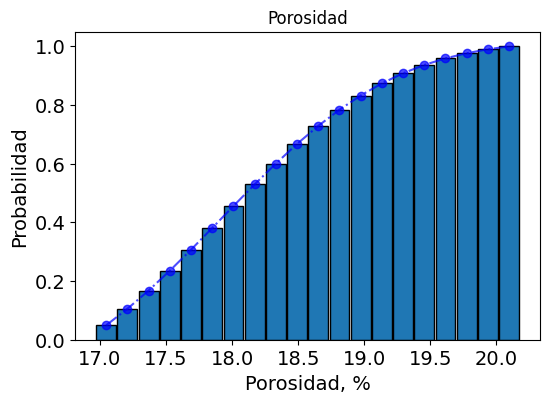

In [ ]:
#Distribución de probabilidad Porosidad
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
ax.bar(ClasePoro,fxPoroAc, ec='black', width = 0.15)
ax.plot(ClasePoro,fxPoroAc,'-.ob',alpha=0.7,label='Distribución de probabilidad acumulada')
ax.set_ylabel('Probabilidad',fontsize=14)
ax.set_xlabel('Porosidad, %',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Porosidad')

Text(0.5, 1.0, 'Saturación de agua')

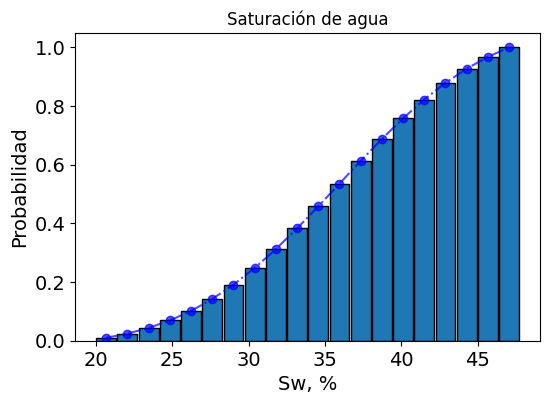

In [ ]:
#Distribución de probabilidad Sw
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
ax.bar(ClaseSw,fxSwAc, ec='black', width = 1.3)
ax.plot(ClaseSw,fxSwAc,'-.ob',alpha=0.7,label='Distribución de probabilidad acumulada')
ax.set_ylabel('Probabilidad',fontsize=14)
ax.set_xlabel('Sw, %',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Saturación de agua')

Text(0.5, 1.0, 'Espesor')

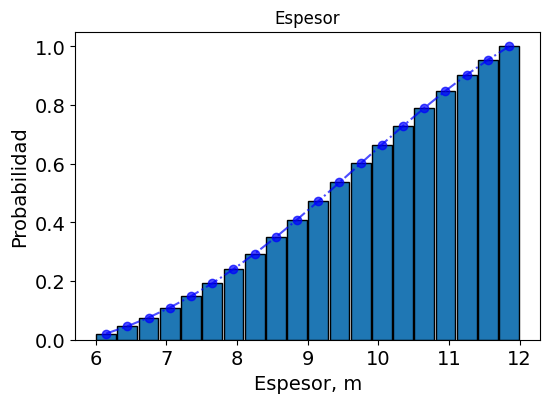

In [ ]:
#Distribución de probabilidad H
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
ax.bar(ClaseH,fxHAc, ec='black', width = 0.28)
ax.plot(ClaseH,fxHAc,'-.ob',alpha=0.7,label='Distribución de probabilidad acumulada')
ax.set_ylabel('Probabilidad',fontsize=14)
ax.set_xlabel('Espesor, m',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Espesor')

## Simulación Montecarlo

Una vez se tienen la distribución de probabilidad de los parámetros de yacimiento involucrados en el cálculo del volumen original de hidrocarburos, se realiza un proceso iterativo con valores aleatorios de probabilidad para cada una de las variables de interés, los valores aleatorios son utilizados en la función objetivo para tener una estimación de probabilística del volumen de hidrocarburos y definir los percentiles de probabilidad del volumen de hidrocarburos (P10, P50, P90).

In [ ]:
#OGIP
points=10000
OGIP=[]
for i in range(0,points):
    XPoro=random.uniform(fxPoroAc[0],fxPoroAc[Dis-1])
    XSw=random.uniform(fxSwAc[0],fxSwAc[Dis-1])
    XH=random.uniform(fxHAc[0],fxHAc[Dis-1])
    rPoro=np.interp(XPoro, fxPoroAc, ClasePoro)
    rSw=np.interp(XSw, fxSwAc, ClaseSw)
    rH=np.interp(XH, fxHAc, ClaseH)


    OP=A*1000**2*rH*rPoro*0.01*(1-(rSw*0.01))*3.28**3/(Bg*1e9)
    OGIP.append(OP)

(0.0, 40.0)

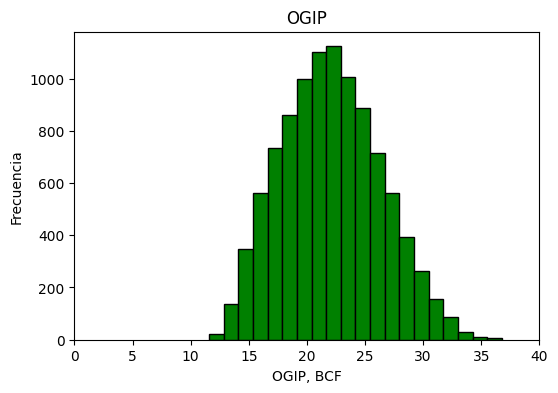

In [ ]:
#Hist. OGIP
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
count, bins, ignored = plt.hist(OGIP, bins=Dis, density = False,  ec="black",color='green')
plt.ylabel('Frecuencia')
plt.xlabel('OGIP, BCF')
plt.title('OGIP')
plt.xlim([0, 40])

In [ ]:
#Función para cálculo de probabilidad acumulada
def CumulativeFunc(mainvar, Dis):

  #Probabilidad acumulada
  count, bins = np.histogram(mainvar, Dis, density = True)  #True para extraer valores en términos de densidad de probailidad

  #Definición de marcas de clase
  width = bins[1]-bins[0]
  classmark = []
  for i in bins:
    OP = i + width/2
    classmark.append(OP)
  classmark.pop(len(bins)-1)

  #Distribución  de probabilidad acumulada
  Cumpdf = []
  OP = 0
  for i in count:
    OP = OP + i
    Cumpdf.append(OP*width)

  return(Cumpdf, classmark)

(0.0, 40.0)

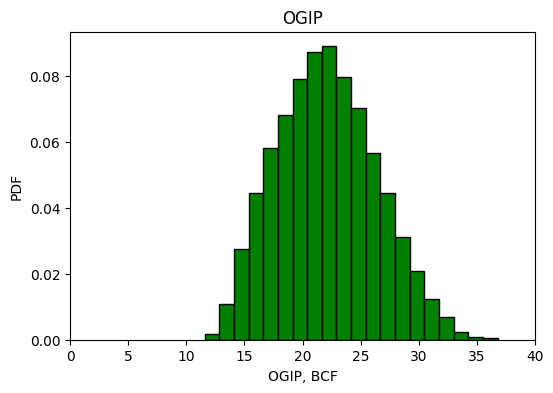

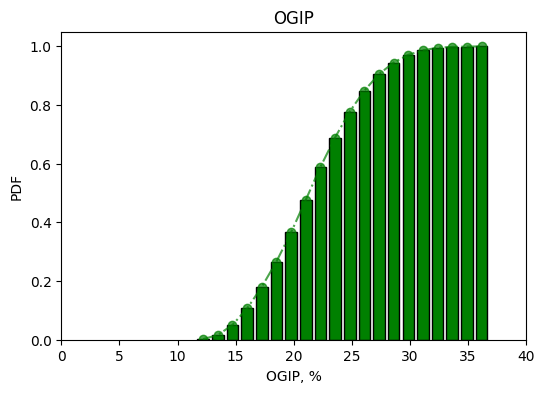

In [ ]:
#Distribución  de probabilidad
fxOGIPAc, ClaseOGIP =  CumulativeFunc(OGIP, Dis)

fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
count, bins, ignored = plt.hist(OGIP, bins=Dis, density = True,  ec="black",color='green')
plt.ylabel('PDF')
plt.xlabel('OGIP, BCF')
plt.title('OGIP')
plt.xlim([0, 40])

fig, ax = plt.subplots(1,1,dpi=100,figsize=(6,4))
ax.bar(ClaseOGIP,fxOGIPAc, ec='black', width = 1, color='green')
ax.plot(ClaseOGIP,fxOGIPAc,'-.og',alpha=0.7)
plt.ylabel('PDF')
plt.xlabel('OGIP, %')
plt.title('OGIP')
plt.xlim([0, 40])

In [ ]:
#Percentiles
x=0.9 #P10
P90=np.interp(x,fxOGIPAc,ClaseOGIP)
x=0.5 #P50
P50=np.interp(x,fxOGIPAc,ClaseOGIP)
x=0.1 #90
P10=np.interp(x,fxOGIPAc,ClaseOGIP)

print(P90)
print(P50)
print(P10)

27.208369938086495
21.293494691238074
15.837926141517599


In [ ]:
#Resumen

#Parámetros estadísticos
#Intervalos
#Frecuencia
#Marcas de clase
#Distribución de probabilidad
#Distribución de probabilidad acumulada
#Simulación
#Percentiles de probabilidad

## Ajuste de distribución de datos

Para realizar el ajuste de las funciones de distribución de probabilidad es posible utilizar la función **skewnorm**:

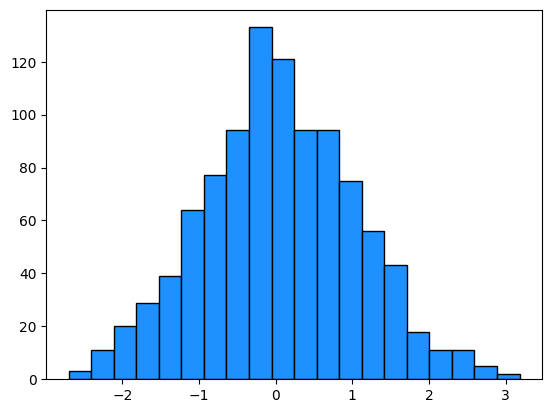

In [ ]:
#Distribución de probabilidad sesgada
from scipy.stats import skewnorm

a = 0                 #Probar rango entre -3 y 3
auxscale = 1          #No negativos
DatosTest = 1000      #Muestra de datos
r = skewnorm.rvs(a, loc=0, scale = auxscale, size = DatosTest) # Función skenorm

#visualización de datos
auxlower = 0
count, bins, ignored = plt.hist(r + auxlower, Dis, density=False, align='mid', ec="black", color='#1E90FF')

In [ ]:
#Función para realizar el ajuste de distribución
def SkewnormFunc(a, auxscale, auxlower, Dis):
    #Ajuste de hisograma con distribuciónnormal sesgada
    from scipy.stats import skewnorm
    r = skewnorm.rvs(a, loc=0, scale = auxscale, size = DatosPoro)
    count, bins, ignored = plt.hist(r + auxlower, Dis, density=True, align='mid', ec="black", color='#FF000000')
    Cumpdf, classmark =  CumulativeFunc(r + auxlower, Dis) #Función anidada

    return(count, bins, Cumpdf, classmark)

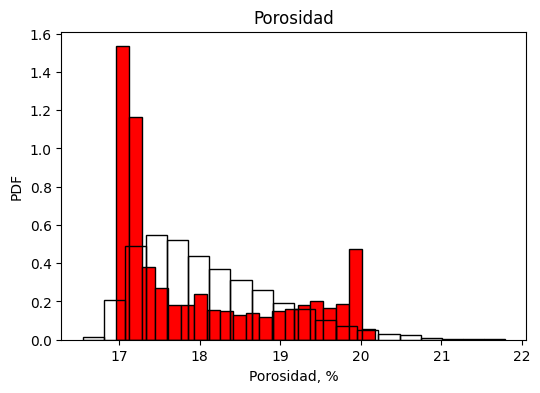

In [ ]:
#Hist. porosidad
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
plt.hist(zPoro, bins=Dis, density = True, ec="black", color='red') #True para graficar como densidad de probabilidad
plt.ylabel('PDF')
plt.xlabel('Porosidad, %')
plt.title('Porosidad')
#plt.xlim([15, 24])

#Ajuste de parámetros
a =9
auxscale = 1.4
auxlower = 17
#a = 9
#auxscale = 1.4
#auxlower = 17
count, bins, CumpdfPoro, classmarkPoro = SkewnormFunc(a, auxscale, auxlower, Dis)

Text(0.5, 1.0, 'Porosidad')

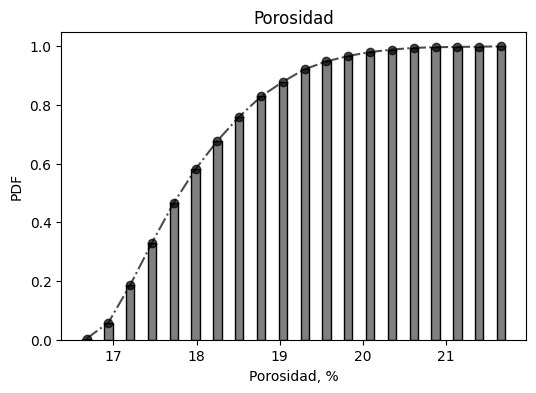

In [ ]:
fig, ax = plt.subplots(1,1,dpi=100,figsize=(6,4))
ax.bar(classmarkPoro, CumpdfPoro, ec='black', width = 0.1, color='grey')
ax.plot(classmarkPoro, CumpdfPoro,'-.ok',alpha=0.7)
plt.ylabel('PDF')
plt.xlabel('Porosidad, %')
plt.title('Porosidad')
#plt.xlim([15, 24])

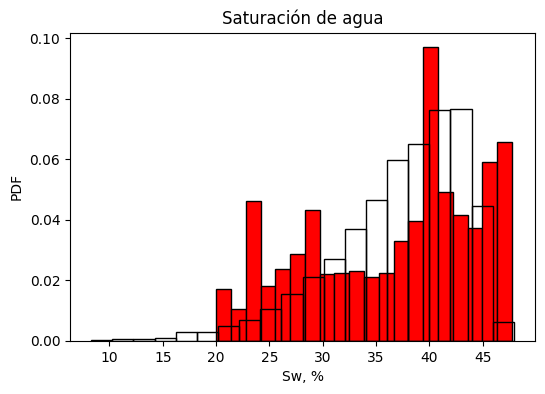

In [ ]:
##Hist. Sw
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
plt.hist(zSw, bins=Dis, density = True, ec="black", color='red')
plt.ylabel('PDF')
plt.xlabel('Sw, %')
plt.title('Saturación de agua')
#plt.xlim([0, 50])

#Ajuste
a = -8
auxscale = 10
auxlower = 45
#a = 9
#auxscale = 9
#auxlower = 21
count, bins, CumpdfSw, classmarkSw = SkewnormFunc(a, auxscale, auxlower, Dis)

Text(0.5, 1.0, 'Sw')

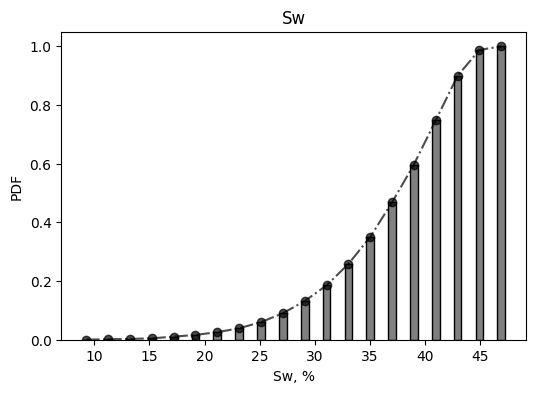

In [ ]:
fig, ax = plt.subplots(1,1,dpi=100,figsize=(6,4))
ax.bar(classmarkSw , CumpdfSw, ec='black', width = 0.7, color='grey')
ax.plot(classmarkSw , CumpdfSw,'-.ok',alpha=0.7)
plt.ylabel('PDF')
plt.xlabel('Sw, %')
plt.title('Sw')
#plt.xlim([0, 50])

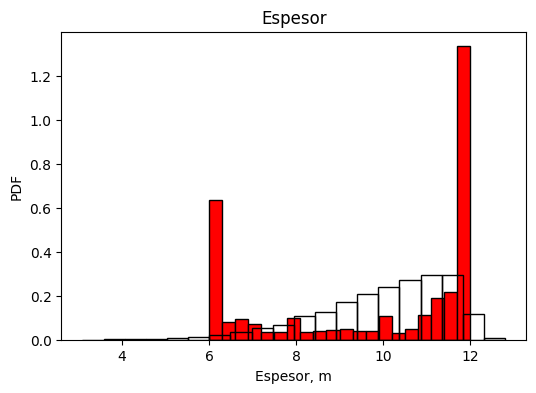

In [ ]:
#Hist. H
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
plt.hist(zH, bins=Dis, density = True, ec="black", color='red')
plt.ylabel('PDF')
plt.xlabel('Espesor, m')
plt.title('Espesor')
#plt.xlim([0, 15])

#Ajuste
a = -9
auxscale = 2.5
auxlower = 12
#a = 9
#auxscale = 2.5
#auxlower = 6
count, bins, CumpdfH, classmarkH = SkewnormFunc(a, auxscale, auxlower, Dis)

Text(0.5, 1.0, 'Espesor')

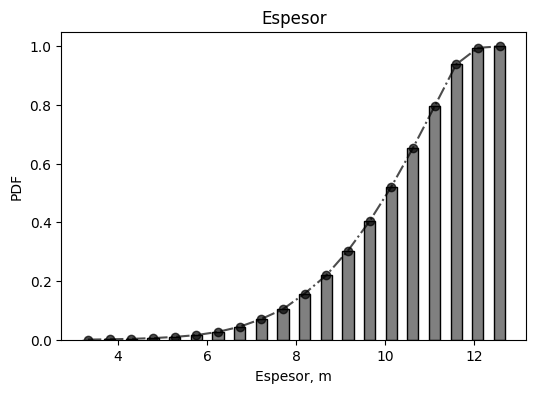

In [ ]:
fig, ax = plt.subplots(1,1,dpi=100,figsize=(6,4))
ax.bar(classmarkH, CumpdfH, ec='black', width = 0.25, color='grey')
ax.plot(classmarkH, CumpdfH,'-.ok',alpha=0.7)
plt.ylabel('PDF')
plt.xlabel('Espesor, m')
plt.title('Espesor')
#plt.xlim([0, 15])

## Simulación Montecarlo de datos ajustados

In [ ]:
#OGIP
points=10000
OGIP=[]
test=[]
for i in range(0,points):
    XPoro=random.uniform(CumpdfPoro[0],CumpdfPoro[Dis-1])
    XSw=random.uniform(CumpdfSw[0],CumpdfSw[Dis-1])
    XH=random.uniform(CumpdfH[0],CumpdfH[Dis-1])
    rPoro=np.interp(XPoro, CumpdfPoro, classmarkPoro)
    rSw=np.interp(XSw, CumpdfSw, classmarkSw)
    rH=np.interp(XH, CumpdfH, classmarkH)

    #test.append(rPoro)

    OP=A*1000**2*rH*rPoro*0.01*(1-(rSw*0.01))*3.28**3/(Bg*1e9)
    OGIP.append(OP)

(0.0, 40.0)

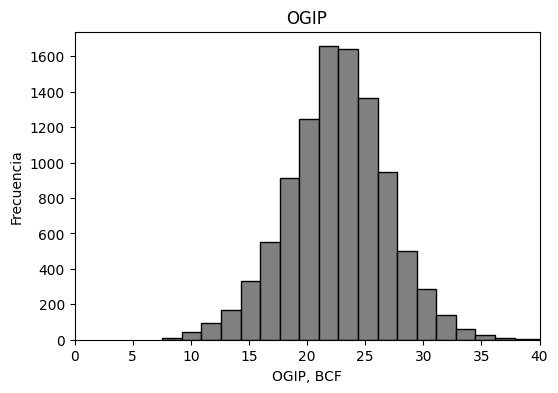

In [ ]:
#Hist. OGIP
fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
count, bins, ignored = plt.hist(OGIP, bins=Dis, density = False,  ec="black",color='grey')
plt.ylabel('Frecuencia')
plt.xlabel('OGIP, BCF')
plt.title('OGIP')
plt.xlim([0, 40])

(0.0, 40.0)

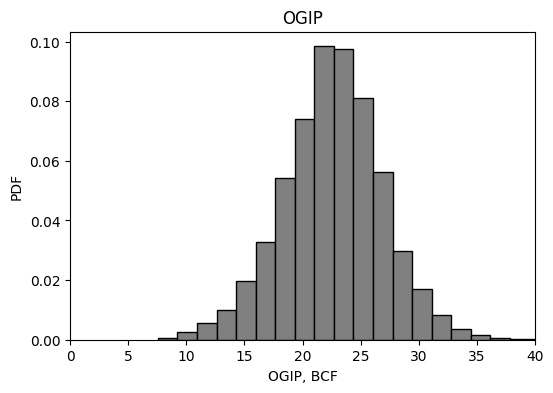

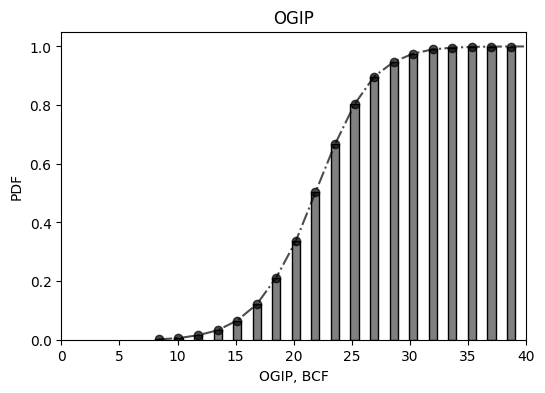

In [ ]:
#Distribución  de probabilidad
fxOGIPAc, ClaseOGIP =  CumulativeFunc(OGIP, Dis)

fig, ax = plt.subplots(1, 1,dpi=100,figsize=(6,4))
count, bins, ignored = plt.hist(OGIP, bins=Dis, density = True,  ec="black",color='grey')
plt.ylabel('PDF')
plt.xlabel('OGIP, BCF')
plt.title('OGIP')
plt.xlim([0, 40])

fig, ax = plt.subplots(1,1,dpi=100,figsize=(6,4))
ax.bar(ClaseOGIP,fxOGIPAc, ec='black', width = 0.7, color='grey')
ax.plot(ClaseOGIP,fxOGIPAc,'-.ok',alpha=0.7)
plt.ylabel('PDF')
plt.xlabel('OGIP, BCF')
plt.title('OGIP')
plt.xlim([0, 40])

In [ ]:
#Percentiles
x=0.9 #P10
P90=np.interp(x,fxOGIPAc,ClaseOGIP)
x=0.5 #P50
P50=np.interp(x,fxOGIPAc,ClaseOGIP)
x=0.1 #90
P10=np.interp(x,fxOGIPAc,ClaseOGIP)

print(P90)
print(P50)
print(P10)

27.005898754589804
21.839153443530176
16.181476842543013


# Conclusiones y comentarios



* El método de Montecarlo para estimación de hidrocarburos permite combinar los estudios de caracterización estática e ingeniería de yacimientos para dar una evaluación del potencial de hidrocarburos en sitio.
* Proporcionar valores de probabilidad de ocurrencia de los volúmenes de hidrocarburos permite identificar el riesgo involucrado en el desarrollo de un campo petrolero.
* Es fundamental la calidad de los datos petrofísicos y de correlación para delimitación del yacimiento y distribución de propiedades ya que estos influyen directamente en el cálculo.
* Para validar los resultados volumétricos obtenidos es recomendable realizar estudios de ingeniería adicionales como pruebas de presión, análisis de comportamiento de producción y estudios de simulación numérica de yacimientos.

### ¿Te gustaría saber más?

En **RAHXION** esperamos que esta demostración sea de utilidad.

* ¿Te gustaría invitarnos para entrenamiento, revisión de proyectos, diseño de flujos de trabajo o consultoria? En **RAHXION** contamos con los expertos para ayudarte gruporahxion@gmail.com

### ¡Síguenos en nuestras redes sociales!
##### [LinkedIn](https://www.linkedin.com/company/rahxion/)